<h1>Applied Data Science Capstone Notebook</h1>
<p>This is the last part of the Coursera specialization: IBM Data Science Professional. I will be using this notebook to show what I have learned.</p>

In [1]:
import pandas as pd
import numpy as np

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


<p>Below cell contains Foursquare API information</p>

In [3]:
# The code was removed by Watson Studio for sharing.

<h2>Week 1</h2>

<h4>Introduction/Business Problem</h4>

<p>New York City is known by many for good food, lots of people, and it's beauty. With almost nine million people, people from all over the world live in New York City. An Italian family has reached out to me and asked about Italian food in New York City. Many Italian immigrants have come to New York over the years and this is not an uncommon concern. Specifically, the family asked what borough and neighborhood has the highest number of Italian restaurants and what borough and neighborhood has the highest average rating for Italian restaurants. They also asked what borough and neighborhood has the lowest average rating for Italian restaurants. Essentially, they want to know where they should go and where they should stay away from in their pursuit of good Italian food. This data could also be useful to a restauranteur who could open up new Italian restaurants in areas where there are very few well established Italian restaurants.</p>

<h4>Data</h4>

<p>We will find the answers to our questions by leveraging Foursquare data and data on New York City (latitude, longitutde, neighborhoods, bouroughs). The data on New York City should be fully provided by this data source: https://cocl.us/new_york_dataset. All data related to locations of  restaurants will be obtained from the FourSquare API used with the Request library in Python.

<h2>Week 2</h2>

<h4>Methodology</h4>

<ol>
    <li>Begin by collecting and cleaning all data about New York City boroughs and neighborhoods</li>
    <li>Find all venues in each NYC borough and neighborhood using the Foursquare API</li>
    <li>Apply a filter to only include Italian restaurants</li>
    <li>Use bar charts to visualize number of Italian restaurants in the 5 neighborhoods with the most Italian restaurants</li>
    <li>Use bar charts to visualize number of Italian restaurants in each of the boroughs</li>
    <li>Use the Foursquare API to get the ratings of all Italian restaurants, then find the top and bottom 5 neighborhoods for Italian restaurants by average rating. Also find for boroughs.</li>
</ol>

<p>All necessary imports:</p>

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 94 kB 6.2 MB/s  eta 0:00:01
Libraries imported.


<p>Obtain and Clean NYC Data</p>

In [5]:
url='https://cocl.us/new_york_dataset'
nydata=requests.get(url).json()
# relevant data in features
neighborhoods_data=nydata['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)    
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


<p>Find all venues using Foursquare </p>

In [6]:
# in order to find the venues, create a function to run queries
def get_nearby_venues(lat,lng,radius=500):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    results = results["response"]['groups'][0]['items']
    venue_details=[]
    for row in results:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

<p>Run queries on Foursquare API, find all venues nearby each neighborhood, then narrow down to italian restaurants. Print how many Italian restaurants in each neighborhood</p>

In [7]:
# get all Italian Restaurants and which Borough/Neighborhood
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_restaurant_df=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_nearby_venues(Latitude,Longitude)
    italian_restaurants_nearby=venues[venues['Category']=='Italian Restaurant']   
    print ('I have found', str(len(italian_restaurants_nearby)), 'Italian Restaurant(s) in '+Neighborhood+', '+Borough)
    for restaurant_detail in italian_restaurants_nearby.values.tolist():
        id, name , category=restaurant_detail
        italian_restaurant_df = italian_restaurant_df.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

I have found 0 Italian Restaurant(s) in Wakefield, Bronx
I have found 0 Italian Restaurant(s) in Co-op City, Bronx
I have found 0 Italian Restaurant(s) in Eastchester, Bronx
I have found 0 Italian Restaurant(s) in Fieldston, Bronx
I have found 0 Italian Restaurant(s) in Riverdale, Bronx
I have found 0 Italian Restaurant(s) in Kingsbridge, Bronx
I have found 0 Italian Restaurant(s) in Marble Hill, Manhattan
I have found 1 Italian Restaurant(s) in Woodlawn, Bronx
I have found 0 Italian Restaurant(s) in Norwood, Bronx
I have found 0 Italian Restaurant(s) in Williamsbridge, Bronx
I have found 0 Italian Restaurant(s) in Baychester, Bronx
I have found 2 Italian Restaurant(s) in Pelham Parkway, Bronx
I have found 1 Italian Restaurant(s) in City Island, Bronx
I have found 1 Italian Restaurant(s) in Bedford Park, Bronx
I have found 0 Italian Restaurant(s) in University Heights, Bronx
I have found 0 Italian Restaurant(s) in Morris Heights, Bronx
I have found 0 Italian Restaurant(s) in Fordham, B

In [8]:
italian_restaurant_df.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Woodlawn,511edb6de4b0d58346fd272d,Patrizia's Of Woodlawn
1,Bronx,Pelham Parkway,4bf96ae65317a593d837017f,Enzo's
2,Bronx,Pelham Parkway,4b47f069f964a5208c4426e3,Pasta Pasta
3,Bronx,City Island,4514ed4df964a520e5391fe3,Artie's Steak and Seafood
4,Bronx,Bedford Park,4b1712a8f964a520dbc123e3,Jolly Tinker


<p>Create graphs to show number of Italian Restaurants in Boroughs and Neighborhoods</p>

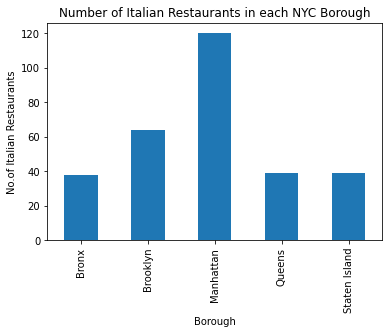

In [9]:
plt.title('Number of Italian Restaurants in each NYC Borough')
plt.xlabel('Borough')
plt.ylabel('No.of Italian Restaurants')
italian_restaurant_df.groupby('Borough')['ID'].count().plot(kind='bar')
plt.show()

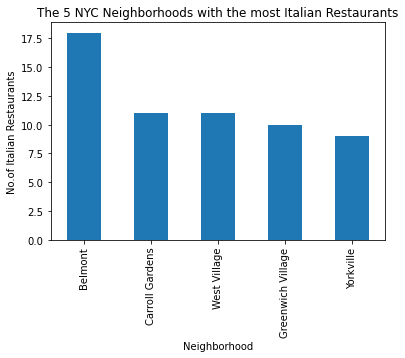

In [10]:
plt.title('The 5 NYC Neighborhoods with the most Italian Restaurants')
plt.xlabel('Neighborhood')
plt.ylabel('No.of Italian Restaurants')
italian_restaurant_df.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
plt.show()

<p>Create function to get the rating of the venue</p>

In [11]:
def get_venue_rating(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    results = results['response']['venue']
    venue_details=[]
    try:
        venue_id=results['id']
        venue_name=results['name']
        venue_rating=results['rating']
        venue_details.append([venue_id,venue_name,venue_rating])
    except KeyError:
        pass
        
    column_names=['ID','Name','Rating']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

<p>Run queries to get ratings of ever venue. If any venue does not have a rating, set rating as zero.</p>

In [12]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Rating']
italian_restaurant_ratings=pd.DataFrame(columns=column_names)
count=1
list_italian_restaurant_df = italian_restaurant_df.values.tolist()
for row in list_italian_restaurant_df:
    #row = list_italian_restaurant_df[idx]
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_rating(ID)
        print(venue_details)
        id,name,rating = venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # assign 0 as default value
        id,name,rating=[0]*3
    print('Processing', count,'of',len(italian_restaurant_df))
    italian_restaurant_ratings = italian_restaurant_ratings.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Rating' : rating,
                                               }, ignore_index=True)
    count+=1

                         ID                    Name  Rating
0  511edb6de4b0d58346fd272d  Patrizia's Of Woodlawn     8.6
Processing 1 of 300
                         ID    Name  Rating
0  4bf96ae65317a593d837017f  Enzo's     8.8
Processing 2 of 300
                         ID         Name  Rating
0  4b47f069f964a5208c4426e3  Pasta Pasta     6.3
Processing 3 of 300
                         ID                       Name  Rating
0  4514ed4df964a520e5391fe3  Artie's Steak and Seafood     8.1
Processing 4 of 300
                         ID          Name  Rating
0  4b1712a8f964a520dbc123e3  Jolly Tinker     7.1
Processing 5 of 300
                         ID           Name  Rating
0  4d4456d93616b60c953fe3c2  Tosca Marquee     7.1
Processing 6 of 300
                         ID        Name  Rating
0  4b10591af964a5205f6e23e3  Patricia's     8.4
Processing 7 of 300
                         ID                 Name  Rating
0  4acf80aef964a52025d420e3  Tino's Delicatessen     9.2
Processing 8 of 

In [13]:
italian_restaurant_ratings.head()

,Borough,Neighborhood,ID,Name,Rating
0,Bronx,Woodlawn,511edb6de4b0d58346fd272d,Patrizia's Of Woodlawn,8.6
1,Bronx,Pelham Parkway,4bf96ae65317a593d837017f,Enzo's,8.8
2,Bronx,Pelham Parkway,4b47f069f964a5208c4426e3,Pasta Pasta,6.3
3,Bronx,City Island,4514ed4df964a520e5391fe3,Artie's Steak and Seafood,8.1
4,Bronx,Bedford Park,4b1712a8f964a520dbc123e3,Jolly Tinker,7.1


In [14]:
italian_restaurant_df.shape

(300, 4)

<p>Save df as csv, because ratings are premium queries.</p>

In [15]:
from project_lib import Project
project = Project(project_id="9fb5e2ac-4f47-4e73-a1e8-ab2624c1b2b0", project_access_token="p-2d7937f6e5c8c15876e1fc52197b6114eeae43a1")
pc = project.project_context
project.save_data(data=italian_restaurant_ratings.to_csv(index=False),file_name='italian_restaurant_ratings.csv',overwrite=True)

{'file_name': 'italian_restaurant_ratings.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'applieddatasciencecapstone-donotdelete-pr-cmscbtowxehren',
 'asset_id': '4e9d5432-00e9-4933-af78-17cdcc8b9ea8'}

<p>Read csv from saved csv in IBM Watson Studio. Below cell contains API keys, so hidden.</p>

In [16]:
# The code was removed by Watson Studio for sharing.

,Borough,Neighborhood,ID,Name,Rating
0,Bronx,Woodlawn,511edb6de4b0d58346fd272d,Patrizia's Of Woodlawn,8.6
1,Bronx,Pelham Parkway,4bf96ae65317a593d837017f,Enzo's,8.8
2,Bronx,Pelham Parkway,4b47f069f964a5208c4426e3,Pasta Pasta,6.3
3,Bronx,City Island,4514ed4df964a520e5391fe3,Artie's Steak and Seafood,8.1
4,Bronx,Bedford Park,4b1712a8f964a520dbc123e3,Jolly Tinker,7.1


<p>Remove all entries where rating = 0 </p>

In [17]:
italian_restaurant_ratings=italian_restaurant_ratings[italian_restaurant_ratings['Rating']!=0]

<p>Plot necessary metrics</p>

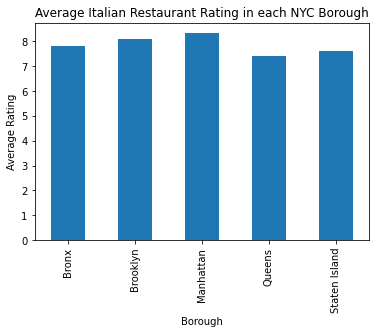

In [18]:
plt.title('Average Italian Restaurant Rating in each NYC Borough')
plt.xlabel('Borough')
plt.ylabel('Average Rating')
italian_restaurant_ratings.groupby('Borough').mean()['Rating'].plot(kind='bar')
plt.show()

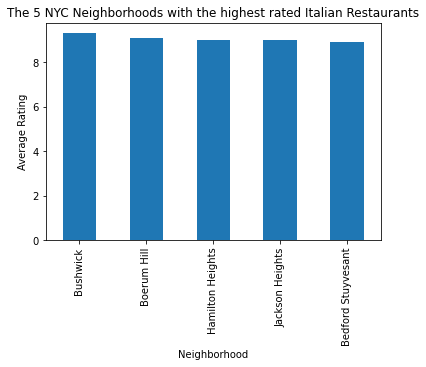

In [19]:
plt.title('The 5 NYC Neighborhoods with the highest rated Italian Restaurants')
plt.xlabel('Neighborhood')
plt.ylabel('Average Rating')
italian_restaurant_ratings.groupby('Neighborhood').mean()['Rating'].nlargest(5).plot(kind='bar')
plt.show()

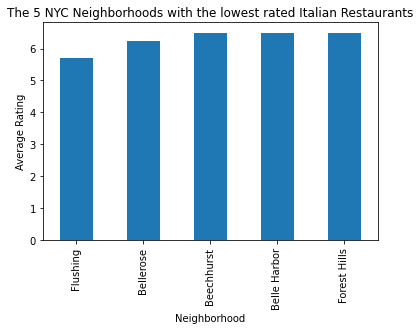

In [20]:
plt.title('The 5 NYC Neighborhoods with the lowest rated Italian Restaurants')
plt.xlabel('Neighborhood')
plt.ylabel('Average Rating')
italian_restaurant_ratings.groupby('Neighborhood').mean()['Rating'].nsmallest(5).plot(kind='bar')
plt.show()